In [2]:
import pandas as pd
import numpy as np

In [3]:
trader_df = pd.read_csv("/content/historical_data.csv")

/tmp/ipython-input-54226123.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trader_df = pd.read_csv("/content/historical_data.csv")


In [5]:

trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149258 entries, 0 to 149257
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           149258 non-null  object 
 1   Coin              149258 non-null  object 
 2   Execution Price   149258 non-null  float64
 3   Size Tokens       149258 non-null  float64
 4   Size USD          149258 non-null  float64
 5   Side              149258 non-null  object 
 6   Timestamp IST     149258 non-null  object 
 7   Start Position    149258 non-null  float64
 8   Direction         149257 non-null  object 
 9   Closed PnL        149257 non-null  float64
 10  Transaction Hash  149257 non-null  object 
 11  Order ID          149257 non-null  float64
 12  Crossed           149257 non-null  object 
 13  Fee               149257 non-null  float64
 14  Trade ID          149257 non-null  float64
 15  Timestamp         149257 non-null  float64
dtypes: float64(9), objec

In [6]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

In [8]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [12]:
trader_df["Timestamp"] = pd.to_datetime(trader_df["Timestamp"], unit="ms", errors="coerce")

In [13]:
trader_df["trade_date"] = trader_df["Timestamp"].dt.date

In [15]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"], errors="coerce")
sentiment_df["trade_date"] = sentiment_df["date"].dt.date

In [16]:
trader_df.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,1
Closed PnL,1


In [17]:
sentiment_df.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
trade_date,0


In [20]:
trader_df = trader_df.dropna(subset=["Closed PnL"])

In [22]:
trader_df = trader_df.dropna(subset=["trade_date"])

In [24]:
sentiment_df = sentiment_df.dropna(subset=["trade_date", "classification"])

In [27]:
sentiment_df = sentiment_df[
    ["trade_date", "classification"]
]

In [28]:
sentiment_df.rename(columns={"classification": "sentiment"}, inplace=True)

In [29]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149257 entries, 0 to 149256
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           149257 non-null  object        
 1   Coin              149257 non-null  object        
 2   Execution Price   149257 non-null  float64       
 3   Size Tokens       149257 non-null  float64       
 4   Size USD          149257 non-null  float64       
 5   Side              149257 non-null  object        
 6   Timestamp IST     149257 non-null  object        
 7   Start Position    149257 non-null  float64       
 8   Direction         149257 non-null  object        
 9   Closed PnL        149257 non-null  float64       
 10  Transaction Hash  149257 non-null  object        
 11  Order ID          149257 non-null  float64       
 12  Crossed           149257 non-null  object        
 13  Fee               149257 non-null  float64       
 14  Trade ID 

In [30]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   trade_date  2644 non-null   object
 1   sentiment   2644 non-null   object
dtypes: object(2)
memory usage: 41.4+ KB


In [32]:
trader_df.rename(columns={
    "Account": "account",
    "Coin": "symbol",
    "Execution Price": "execution_price",
    "Size Tokens": "size_tokens",
    "Size USD": "size_usd",
    "Side": "side",
    "Timestamp IST": "timestamp_ist",
    "Start Position": "start_position",
    "Direction": "direction",
    "Closed PnL": "closed_pnl",
    "Transaction Hash": "tx_hash",
    "Order ID": "order_id",
    "Crossed": "crossed",
    "Fee": "fee",
    "Trade ID": "trade_id"
}, inplace=True)

In [33]:
trader_df.columns

Index(['account', 'symbol', 'execution_price', 'size_tokens', 'size_usd',
       'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'tx_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'Timestamp',
       'trade_date'],
      dtype='object')

In [34]:
trader_df["trade_date"] = pd.to_datetime(trader_df["trade_date"])
sentiment_df["trade_date"] = pd.to_datetime(sentiment_df["trade_date"])


In [36]:
trader_df = trader_df[
    [
        "account",
        "symbol",
        "side",
        "execution_price",
        "size_usd",
        "closed_pnl",
        "fee",
        "trade_date"
    ]
  ]

In [37]:
trader_df.head()

,account,symbol,side,execution_price,size_usd,closed_pnl,fee,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9769,7872.16,0.0,0.345404,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9800,127.68,0.0,0.005600,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9855,1150.63,0.0,0.050431,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9874,1142.04,0.0,0.050043,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9894,69.75,0.0,0.003055,2024-10-27


In [38]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149257 entries, 0 to 149256
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   account          149257 non-null  object        
 1   symbol           149257 non-null  object        
 2   side             149257 non-null  object        
 3   execution_price  149257 non-null  float64       
 4   size_usd         149257 non-null  float64       
 5   closed_pnl       149257 non-null  float64       
 6   fee              149257 non-null  float64       
 7   trade_date       149257 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 10.2+ MB


In [39]:

sentiment_df.head()

,trade_date,sentiment
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [40]:
trader_df.head()

,account,symbol,side,execution_price,size_usd,closed_pnl,fee,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9769,7872.16,0.0,0.345404,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9800,127.68,0.0,0.005600,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9855,1150.63,0.0,0.050431,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9874,1142.04,0.0,0.050043,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9894,69.75,0.0,0.003055,2024-10-27


In [41]:
merged_df = pd.merge(
    trader_df,
    sentiment_df,
    on="trade_date",
    how="left"
)

In [42]:
merged_df.head()

,account,symbol,side,execution_price,size_usd,closed_pnl,fee,trade_date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9769,7872.16,0.0,0.345404,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9800,127.68,0.0,0.005600,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9855,1150.63,0.0,0.050431,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9874,1142.04,0.0,0.050043,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7.9894,69.75,0.0,0.003055,2024-10-27,Greed


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149257 entries, 0 to 149256
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   account          149257 non-null  object        
 1   symbol           149257 non-null  object        
 2   side             149257 non-null  object        
 3   execution_price  149257 non-null  float64       
 4   size_usd         149257 non-null  float64       
 5   closed_pnl       149257 non-null  float64       
 6   fee              149257 non-null  float64       
 7   trade_date       149257 non-null  datetime64[ns]
 8   sentiment        129703 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 10.2+ MB


In [44]:
merged_df["sentiment"].isnull().sum()

np.int64(19554)

In [45]:
merged_df = merged_df.dropna(subset=["sentiment"])

In [46]:
merged_df["sentiment"].value_counts()

,count
sentiment,
Fear,91488
Greed,24117
Neutral,7136
Extreme Greed,6962


<Axes: title={'center': 'Market Sentiment Distribution'}, xlabel='sentiment'>

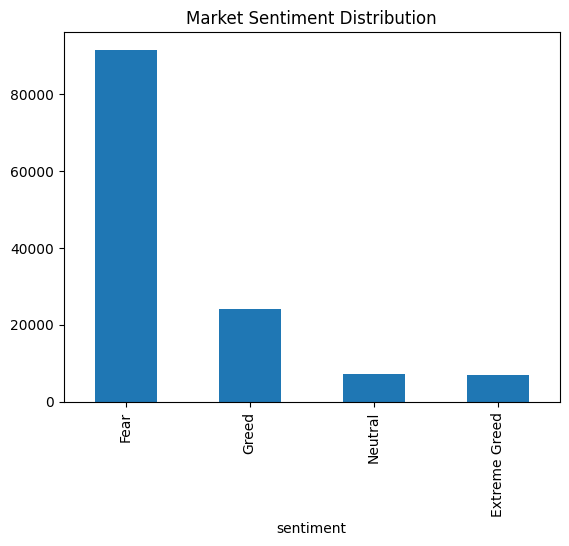

In [47]:
merged_df["sentiment"].value_counts().plot(kind="bar", title="Market Sentiment Distribution")

In [48]:
merged_df.groupby("sentiment")["closed_pnl"].mean()

,closed_pnl
sentiment,
Extreme Greed,25.418772
Fear,58.199296
Greed,84.687293
Neutral,22.245429


<Axes: title={'center': 'Average PnL by Market Sentiment'}, xlabel='sentiment'>

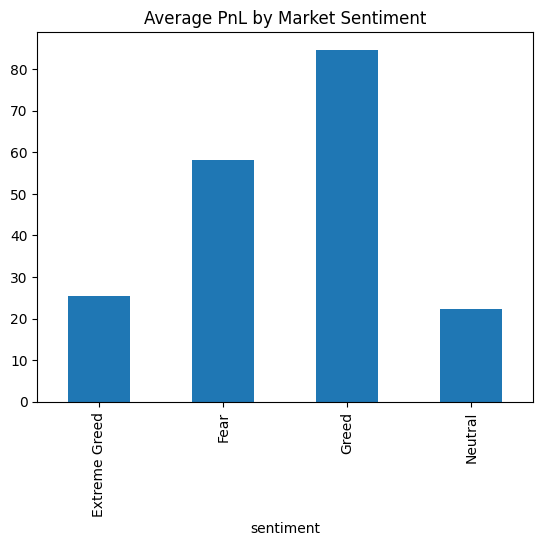

In [49]:
merged_df.groupby("sentiment")["closed_pnl"].mean().plot(
    kind="bar",
    title="Average PnL by Market Sentiment"
)

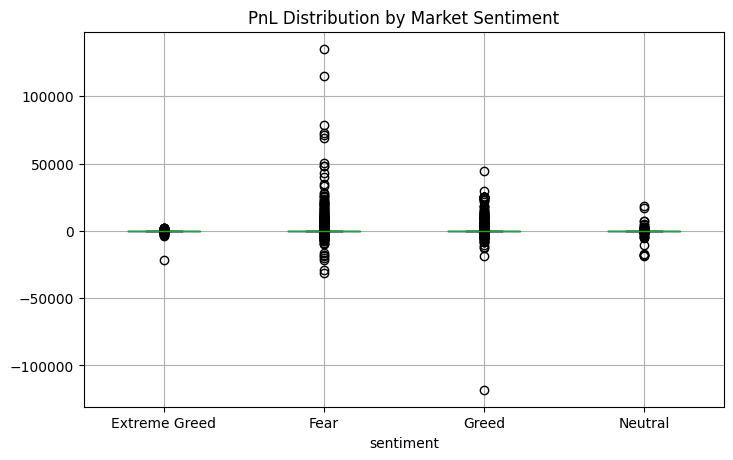

In [50]:
import matplotlib.pyplot as plt

merged_df.boxplot(
    column="closed_pnl",
    by="sentiment",
    figsize=(8,5)
)
plt.title("PnL Distribution by Market Sentiment")
plt.suptitle("")
plt.show()

In [51]:
merged_df.groupby(["sentiment", "side"])["closed_pnl"].mean()

sentiment      side
Extreme Greed  BUY      25.578564
               SELL     25.268770
Fear           BUY      72.503841
               SELL     43.541458
Greed          BUY     -14.597392
               SELL    168.548451
Neutral        BUY      15.655326
               SELL     28.599717
Name: closed_pnl, dtype: float64

<Axes: title={'center': 'Average PnL by Sentiment and Trade Side'}, xlabel='sentiment'>

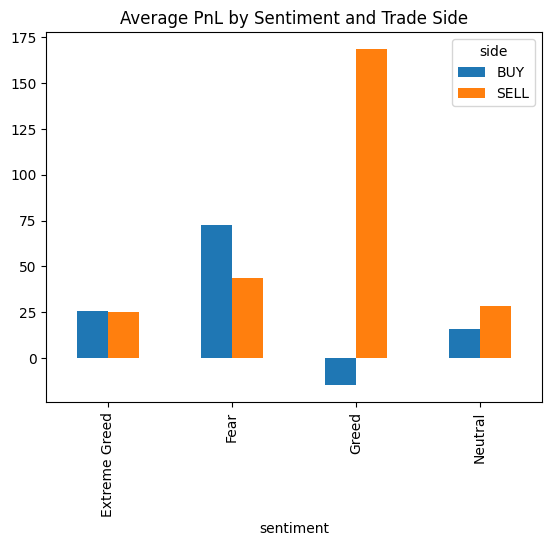

In [52]:
merged_df.groupby(["sentiment", "side"])["closed_pnl"].mean().unstack().plot(
    kind="bar",
    title="Average PnL by Sentiment and Trade Side"
)

In [54]:
merged_df["win"] = merged_df["closed_pnl"] > 0

In [55]:
merged_df.groupby("sentiment")["win"].mean()

,win
sentiment,
Extreme Greed,0.490089
Fear,0.419366
Greed,0.409462
Neutral,0.317405


<Axes: title={'center': 'Win Rate by Market Sentiment'}, xlabel='sentiment'>

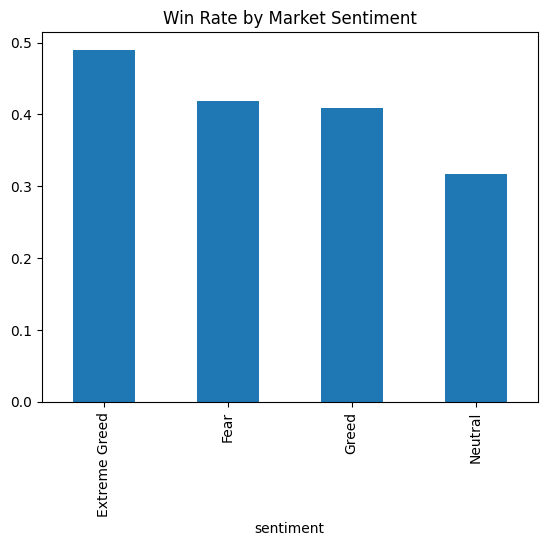

In [56]:
merged_df.groupby("sentiment")["win"].mean().plot(
    kind="bar",
    title="Win Rate by Market Sentiment"
)
